<a href="https://colab.research.google.com/github/darshanvjani/Kickstarter-Campaigns-Analysis/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
README

We have performed initial data exploration to understand what the data is and to think about the stratifies of how to handle it.
'''

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
full = pd.read_csv('/content/drive/MyDrive/257/ML Project/kickstarter_data_full.csv')
full.head()

,Unnamed: 0,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,...,launch_to_deadline,launch_to_state_change,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend
0,0,1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,...,36 days 20:47:24.000000000,36 days 20:47:24.000000000,17,36,36,0,1,1,0,0
1,1,1655206086,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Jump Start Kindergarten Toolkit,"This kit teaches how to print, correct an ugly...",500.0,0.0,failed,jump-start-kindergarten-toolkit,False,...,60 days 00:00:00.000000000,60 days 00:00:02.000000000,10,60,60,0,1,1,0,0
2,2,311581827,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,"Establishing a free, world-class, public libra...",100000.0,120.0,failed,ojukwu-balewa-awolowo-oba-public-library-of-ni...,False,...,60 days 00:00:00.000000000,60 days 00:00:01.000000000,1,60,60,0,1,1,0,0
3,3,859724515,"{""small"":""https://ksr-ugc.imgix.net/assets/011...","MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",Goal: Introducing a new word into the English ...,5000.0,0.0,failed,mastize-mas-tahyz-mas-tahyz-to-spread,False,...,30 days 00:00:00.000000000,30 days 00:00:00.000000000,0,30,30,0,1,1,0,0
4,4,1613604977,"{""small"":""https://ksr-ugc.imgix.net/assets/012...","Synopse der EU-DSGVO - Artikel, Erwägungsgründ...",Zu den Artikeln der DSGVO sind die korrespondi...,3222.0,356.0,failed,synopse-der-eu-dsgvo-artikel-erwagungsgrunde-bdsg,False,...,32 days 06:02:33.000000000,32 days 06:02:33.000000000,0,32,32,0,0,0,0,0


In [ ]:
full_1 = full.drop(['Unnamed: 0', 'id', 'photo', 'friends', 'is_starred', 'is_backing', 'permissions'], axis=1)

In [ ]:
full_1.head(1)

,name,blurb,goal,pledged,state,slug,disable_communication,country,currency,currency_symbol,...,launch_to_deadline,launch_to_state_change,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend
0,Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,US,USD,$,...,36 days 20:47:24.000000000,36 days 20:47:24.000000000,17,36,36,0,1,1,0,0


In [ ]:
full_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20632 entries, 0 to 20631
Data columns (total 61 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         20632 non-null  object 
 1   blurb                        20627 non-null  object 
 2   goal                         20632 non-null  float64
 3   pledged                      20632 non-null  float64
 4   state                        20632 non-null  object 
 5   slug                         20632 non-null  object 
 6   disable_communication        20632 non-null  bool   
 7   country                      20632 non-null  object 
 8   currency                     20632 non-null  object 
 9   currency_symbol              20632 non-null  object 
 10  currency_trailing_code       20632 non-null  bool   
 11  deadline                     20632 non-null  object 
 12  state_changed_at             20632 non-null  object 
 13  created_at      

###Goal Feature EDA

In [ ]:
full_1['goal'].value_counts()

10000.0     1480
5000.0      1323
50000.0     1302
20000.0      946
25000.0      839
            ... 
370000.0       1
25730.0        1
55650.0        1
622942.0       1
55151.0        1
Name: goal, Length: 1204, dtype: int64

In [ ]:
temp_df = full_1['goal']

from scipy import stats
z = np.abs(stats.zscore(temp_df))

# Define a threshold (e.g. 3) for identifying outliers
threshold = 0.068

# Find the indices of the outliers
outlier_indices = np.where(z > threshold)

# Remove the outliers from the DataFrame
df_clean = temp_df.drop(outlier_indices[0], axis=0)
df_clean.shape

(14771,)

array([[<Axes: title={'center': 'goal'}>]], dtype=object)

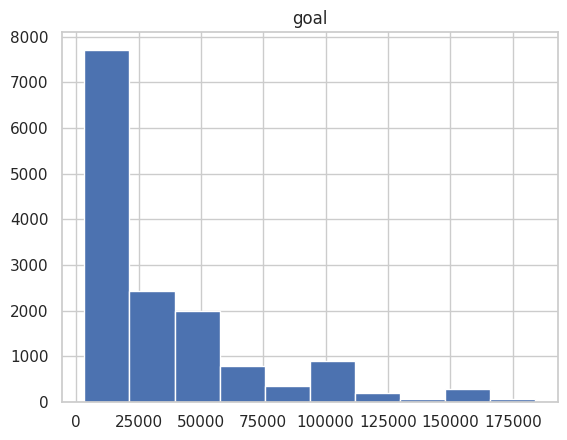

In [ ]:
pd.DataFrame(df_clean).hist()

<Axes: >

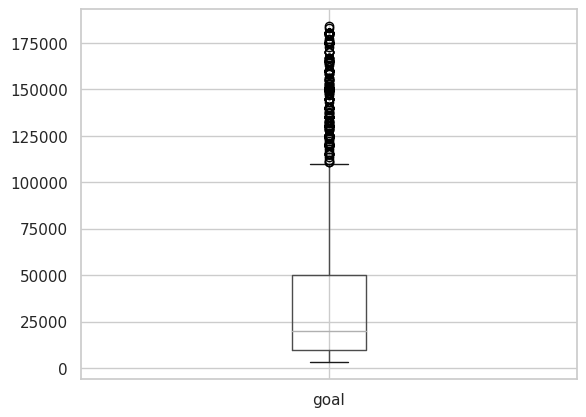

In [ ]:
pd.DataFrame(df_clean).boxplot(column=['goal'])

array([[<Axes: title={'center': 'goal'}>]], dtype=object)

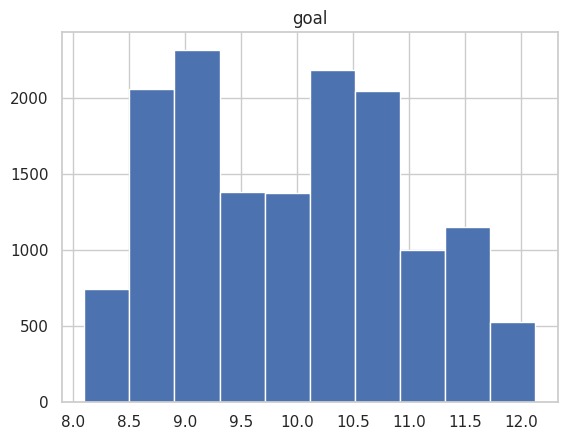

In [ ]:
# full_1.drop(['goal_scaler'],axis=1,inplace=True)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# after_outlier_scaling_goal = scaler.fit_transform(pd.DataFrame(df_clean).values.reshape(-1,1))
after_outlier_scaling_goal = np.log(df_clean)
pd.DataFrame(after_outlier_scaling_goal).hist()

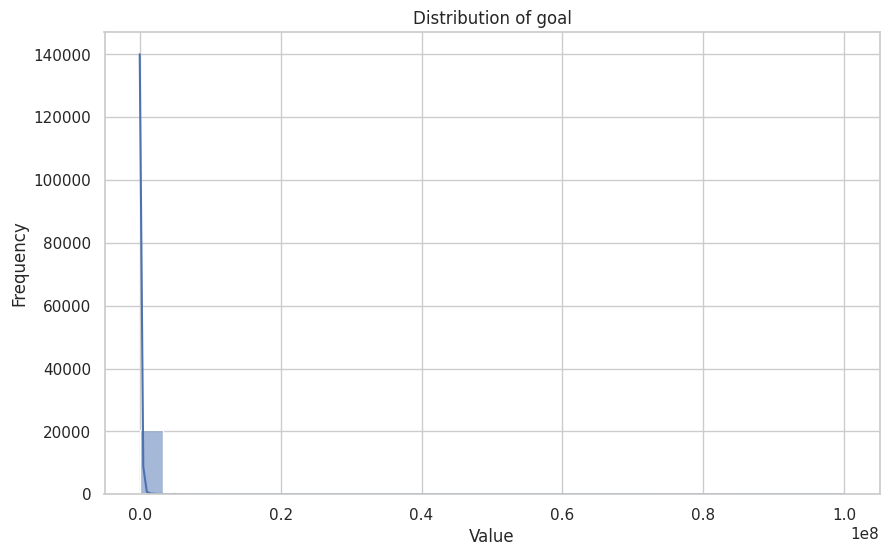

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
feature = 'goal'
# Create a histogram and kernel density estimate (KDE) plot
sns.histplot(full_1['goal'], kde=True, bins=30)

# Add labels and a title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(f'Distribution of {feature}')

# Display the plot
plt.show()

###pledged

In [ ]:
def feature_eda(feature_name):
  print(full_1[feature_name].head())
  print()
  print()
  print(full_1[feature_name].value_counts())
  print()
  print()
  # print(full_1[feature_name].hist())
  # # print(full_1.boxplot(column=[feature_name]))
  # plt.show()

0      0.0
1      0.0
2    120.0
3      0.0
4    356.0
Name: pledged, dtype: float64


0.00         2936
1.00          586
10.00         313
5.00          199
2.00          197
             ... 
3431.00         1
26823.01        1
196362.57       1
212513.64       1
1559.00         1
Name: pledged, Length: 8722, dtype: int64


Axes(0.125,0.11;0.775x0.77)


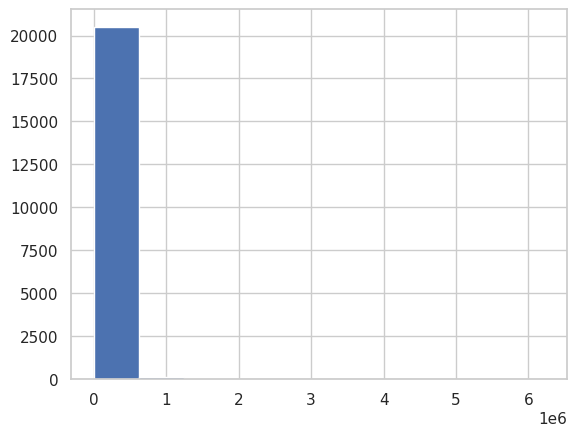

In [ ]:
feature_eda('pledged')

Axes(0.125,0.11;0.775x0.77)


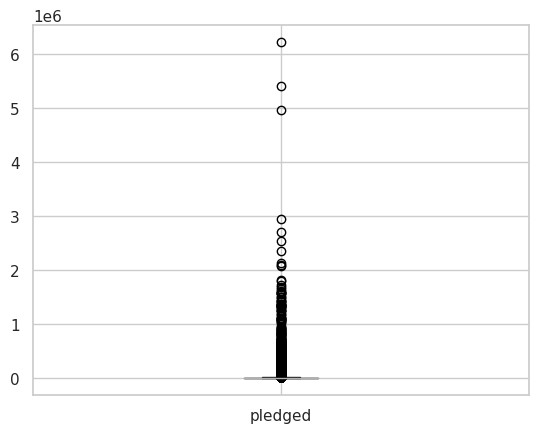

In [ ]:
print(full_1.boxplot(column=['pledged']))

In [ ]:
temp_df = full_1['pledged']

from scipy import stats
z = np.abs(stats.zscore(temp_df))

# Define a threshold (e.g. 3) for identifying outliers
threshold = 0.19

# Find the indices of the outliers
outlier_indices = np.where(z > threshold)

# Remove the outliers from the DataFrame
df_clean = temp_df.drop(outlier_indices[0], axis=0)
df_clean.shape

(18890,)

array([[<Axes: title={'center': 'pledged'}>]], dtype=object)

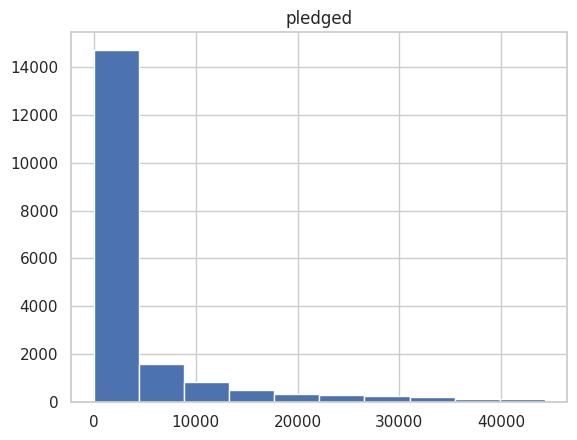

In [ ]:
pd.DataFrame(df_clean).hist()

###Slug

In [ ]:
feature_eda('slug')

0    auntie-dis-music-time-sign-asl-for-hearing-and...
1                      jump-start-kindergarten-toolkit
2    ojukwu-balewa-awolowo-oba-public-library-of-ni...
3                mastize-mas-tahyz-mas-tahyz-to-spread
4    synopse-der-eu-dsgvo-artikel-erwagungsgrunde-bdsg
Name: slug, dtype: object


auntie-dis-music-time-sign-asl-for-hearing-and-hoh    1
jackie-and-the-beanstalk-a-re-spun-yarn               1
piq-a-jukebox-for-social-spaces                       1
presenting-slacker-a-revolutionary-new-tool           1
energybridge-solar-power-grid-tie-and-backup-in-on    1
                                                     ..
breanna-jean                                          1
website-building-app                                  1
website-for-parents-of-twins-and-multiples            1
annuaire-des-artisans-marocains-sans-moyen-de-mark    1
lets-trail-app                                        1
Name: slug, Length: 20632, dtype: int64




currency_trailing_code

In [ ]:
feature_eda('currency_trailing_code')

0     True
1     True
2     True
3     True
4    False
Name: currency_trailing_code, dtype: bool


True     16422
False     4210
Name: currency_trailing_code, dtype: int64




deadline

In [ ]:
feature_eda('currency_trailing_code')

0     True
1     True
2     True
3     True
4    False
Name: currency_trailing_code, dtype: bool


True     16422
False     4210
Name: currency_trailing_code, dtype: int64




In [ ]:
feature_eda('state_changed_at')

0    1/23/2015 10:35
1     5/1/2015 16:13
2     3/26/2015 8:17
3     10/6/2014 0:41
4    6/27/2016 12:00
Name: state_changed_at, dtype: object


12/31/2014 22:59    6
3/31/2016 22:59     5
8/31/2014 22:59     5
6/30/2015 22:59     5
9/30/2016 22:59     4
                   ..
12/9/2015 17:07     1
10/31/2016 9:00     1
1/1/2015 11:15      1
11/28/2015 14:30    1
11/20/2014 4:24     1
Name: state_changed_at, Length: 20238, dtype: int64




In [ ]:
feature_eda('created_at')

0    11/29/2014 22:55
1      2/20/2015 9:28
2      1/24/2015 0:08
3      9/5/2014 22:30
4     5/25/2016 14:09
Name: created_at, dtype: object


2/9/2015 14:08     3
9/10/2014 12:47    2
7/9/2014 19:17     2
5/19/2016 9:58     2
5/6/2015 13:37     2
                  ..
6/9/2015 9:15      1
10/1/2015 7:21     1
5/11/2016 13:37    1
9/30/2016 4:31     1
9/28/2014 5:42     1
Name: created_at, Length: 20483, dtype: int64




In [ ]:
feature_eda('launched_at')

0    12/17/2014 13:47
1      3/2/2015 16:13
2      1/25/2015 8:17
3       9/6/2014 0:41
4      5/26/2016 5:57
Name: launched_at, dtype: object


7/22/2014 11:00     3
7/8/2014 12:30      3
1/26/2017 11:22     2
3/4/2015 15:07      2
11/3/2015 9:00      2
                   ..
6/12/2015 12:03     1
12/28/2016 20:35    1
3/9/2016 6:41       1
10/6/2014 17:31     1
10/21/2014 4:24     1
Name: launched_at, Length: 20448, dtype: int64




In [ ]:
feature_eda('staff_pick')

0    False
1    False
2    False
3    False
4    False
Name: staff_pick, dtype: bool


False    18447
True      2185
Name: staff_pick, dtype: int64




In [ ]:
feature_eda('backers_count')

0     0
1     0
2     5
3     0
4    17
Name: backers_count, dtype: int64


0       2936
1       1914
2       1276
3        910
4        714
        ... 
1513       1
3863       1
2051       1
737        1
819        1
Name: backers_count, Length: 1505, dtype: int64




<Axes: >

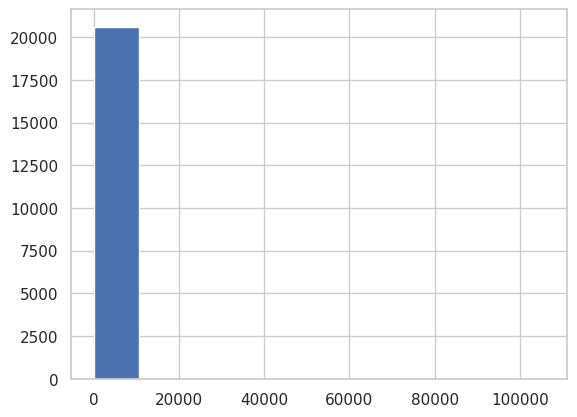

In [ ]:
full_1['backers_count'].hist()

<Axes: >

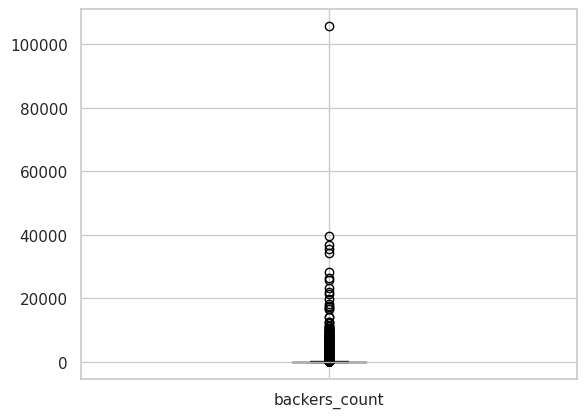

In [ ]:
full_1.boxplot(column=['backers_count'])

In [ ]:
feature_eda('static_usd_rate')

0    1.000000
1    1.000000
2    1.000000
3    1.000000
4    1.114613
Name: static_usd_rate, dtype: float64


1.000000    14142
1.095020       18
1.115888       18
1.713370       12
1.714466       12
            ...  
1.418456        1
1.375722        1
0.116673        1
1.088146        1
1.000703        1
Name: static_usd_rate, Length: 3136, dtype: int64




<Axes: >

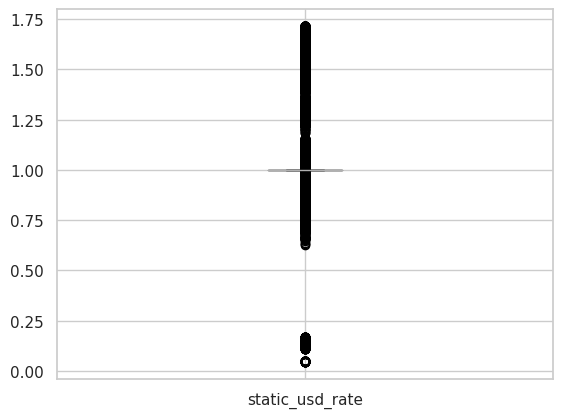

In [ ]:
full_1.boxplot(column=['static_usd_rate'])

<Axes: >

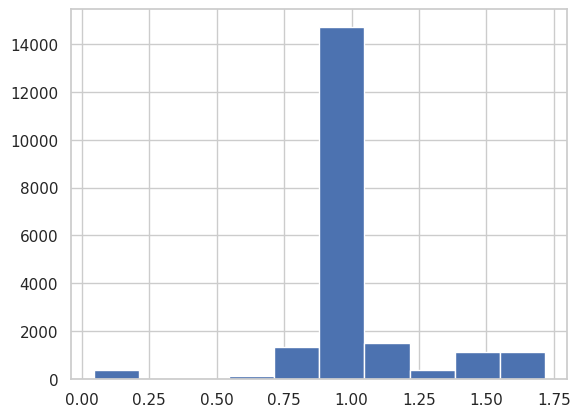

In [ ]:
full_1['static_usd_rate'].hist()

In [ ]:
feature_eda('usd_pledged')

0      0.000000
1      0.000000
2    120.000000
3      0.000000
4    396.802395
Name: usd_pledged, dtype: float64


0.000000        2936
1.000000         364
10.000000        192
25.000000        149
50.000000        137
                ... 
58.068995          1
3427.000000        1
2201.677381        1
54681.000000       1
485.123930         1
Name: usd_pledged, Length: 12235, dtype: int64




<Axes: >

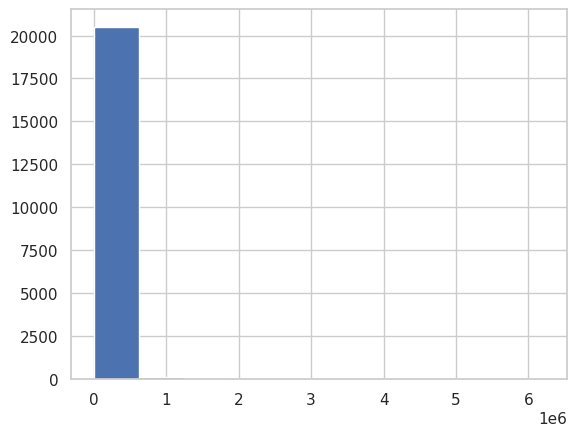

In [ ]:
full_1['usd_pledged'].hist()

<Axes: >

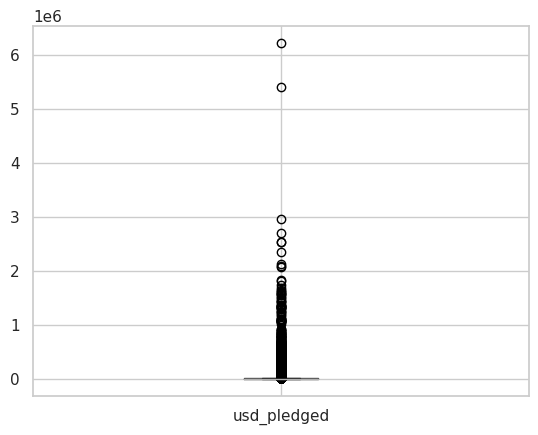

In [ ]:
full_1.boxplot(column=['usd_pledged'])

In [ ]:
feature_eda('creator')

0    {"urls":{"web":{"user":"https://www.kickstarte...
1    {"urls":{"web":{"user":"https://www.kickstarte...
2    {"urls":{"web":{"user":"https://www.kickstarte...
3    {"urls":{"web":{"user":"https://www.kickstarte...
4    {"urls":{"web":{"user":"https://www.kickstarte...
Name: creator, dtype: object


{"urls":{"web":{"user":"https://www.kickstarter.com/profile/land-boards"},"api":{"user":"https://api.kickstarter.com/v1/users/1546666383?signature=1487284882.82aacc6a0d3bf326d3c618d1ee189124e47abd20"}},"name":"Doug Gilliland","id":1546666383,"avatar":{"small":"https://ksr-ugc.imgix.net/assets/008/926/025/c888de15946bd3091a62450d5a68f02d_original.JPG?w=160&h=160&fit=crop&v=1480788385&auto=format&q=92&s=80b39e279ecc9afd0596690303dd0261","thumb":"https://ksr-ugc.imgix.net/assets/008/926/025/c888de15946bd3091a62450d5a68f02d_original.JPG?w=40&h=40&fit=crop&v=1480788385&auto=format&q=92&s=652b8b0b15352109bee31c6451962acf","medium":"https://ksr-ugc.imgix.net/assets/008/926/025/c888de15946bd30

In [ ]:
feature_eda('location')

0    {"country":"US","urls":{"web":{"discover":"htt...
1    {"country":"US","urls":{"web":{"discover":"htt...
2    {"country":"NG","urls":{"web":{"discover":"htt...
3    {"country":"US","urls":{"web":{"discover":"htt...
4    {"country":"DE","urls":{"web":{"discover":"htt...
Name: location, dtype: object


{"country":"GB","urls":{"web":{"discover":"https://www.kickstarter.com/discover/places/london-gb","location":"https://www.kickstarter.com/locations/london-gb"},"api":{"nearby_projects":"https://api.kickstarter.com/v1/discover?signature=1487275935.3fd1a29e3904e654fda33e02590c3487346a5be6&woe_id=44418"}},"name":"London","displayable_name":"London, UK","short_name":"London, UK","id":44418,"state":"England","type":"Town","is_root":false,"slug":"london-gb"}                                                                                           550
{"country":"US","urls":{"web":{"discover":"https://www.kickstarter.com/discover/places/new-york-ny","location":"https://www.kickstarter.com/lo

In [ ]:
feature_eda('category')

0    Academic
1    Academic
2    Academic
3    Academic
4    Academic
Name: category, dtype: object


Web             3325
Hardware        3248
Software        2631
Gadgets         2336
Plays           1184
Apps            1168
Wearables        971
Musical          791
Sound            528
Festivals        482
Robots           473
Flight           373
Experimental     321
Immersive        277
Makerspaces      203
Spaces           182
Places           100
Shorts            40
Thrillers         20
Webseries         20
Restaurants       20
Blues             20
Academic          20
Comedy            10
Name: category, dtype: int64




In [ ]:
feature_eda('profile')

0    {"background_image_opacity":0.8,"should_show_f...
1    {"background_image_opacity":0.8,"should_show_f...
2    {"background_image_opacity":0.8,"should_show_f...
3    {"background_image_opacity":0.8,"should_show_f...
4    {"background_image_opacity":0.8,"should_show_f...
Name: profile, dtype: object


{"background_image_opacity":0.8,"should_show_feature_image_section":true,"link_text_color":null,"state_changed_at":1425915885,"blurb":null,"background_color":null,"project_id":1546341,"name":null,"feature_image_attributes":{"image_urls":{"default":"https://ksr-ugc.imgix.net/assets/011/959/953/4e53aa51f82e9764b135307761da1cde_original.JPG?w=1552&h=873&fit=fill&bg=000000&v=1463719439&auto=format&q=92&s=70c684eaeb2b96fff3283fa72daeabee","baseball_card":"https://ksr-ugc.imgix.net/assets/011/959/953/4e53aa51f82e9764b135307761da1cde_original.JPG?w=1552&h=873&fit=fill&bg=000000&v=1463719439&auto=format&q=92&s=70c684eaeb2b96fff3283fa72daeabee"}},"link_url":null,"show_feature_image":false,"id":

In [ ]:
feature_eda('spotlight')

0    False
1    False
2    False
3    False
4    False
Name: spotlight, dtype: bool


False    14614
True      6018
Name: spotlight, dtype: int64




In [ ]:
feature_eda('urls')

0    {"web":{"project":"https://www.kickstarter.com...
1    {"web":{"project":"https://www.kickstarter.com...
2    {"web":{"project":"https://www.kickstarter.com...
3    {"web":{"project":"https://www.kickstarter.com...
4    {"web":{"project":"https://www.kickstarter.com...
Name: urls, dtype: object


{"web":{"project":"https://www.kickstarter.com/projects/1469579873/auntie-dis-music-time-sign-asl-for-hearing-and-hoh?ref=category","rewards":"https://www.kickstarter.com/projects/1469579873/auntie-dis-music-time-sign-asl-for-hearing-and-hoh/rewards"}}    1
{"web":{"project":"https://www.kickstarter.com/projects/okaytotell/jackie-and-the-beanstalk-a-re-spun-yarn?ref=category","rewards":"https://www.kickstarter.com/projects/okaytotell/jackie-and-the-beanstalk-a-re-spun-yarn/rewards"}}                          1
{"web":{"project":"https://www.kickstarter.com/projects/piq/piq-a-jukebox-for-social-spaces?ref=category","rewards":"https://www.kickstarter.com/projects/piq/piq-a-jukebox-for-socia

In [ ]:
feature_eda('source_url')

0    https://www.kickstarter.com/discover/categorie...
1    https://www.kickstarter.com/discover/categorie...
2    https://www.kickstarter.com/discover/categorie...
3    https://www.kickstarter.com/discover/categorie...
4    https://www.kickstarter.com/discover/categorie...
Name: source_url, dtype: object


https://www.kickstarter.com/discover/categories/technology/web?ref=category_modal&sort=magic                       3325
https://www.kickstarter.com/discover/categories/technology/hardware?ref=category_modal&sort=magic                  3248
https://www.kickstarter.com/discover/categories/technology/software?ref=category_modal&sort=magic                  2631
https://www.kickstarter.com/discover/categories/technology/gadgets?ref=category_modal&sort=magic                   2336
https://www.kickstarter.com/discover/categories/theater/plays?ref=category_modal&sort=magic                        1184
https://www.kickstarter.com/discover/categories/technology/apps?ref=category_modal&sort=mag

In [ ]:
feature_eda('name_len')

0    11.0
1     4.0
2     8.0
3     7.0
4     7.0
Name: name_len, dtype: float64


8.0     2610
7.0     2531
6.0     2298
5.0     2074
4.0     2030
9.0     2022
3.0     1962
2.0     1568
1.0     1346
10.0    1291
11.0     630
12.0     209
13.0      40
14.0       9
15.0       6
16.0       1
Name: name_len, dtype: int64




In [ ]:
feature_eda('name_len_clean')

0    9.0
1    4.0
2    8.0
3    6.0
4    7.0
Name: name_len_clean, dtype: float64


6.0     3128
7.0     2941
5.0     2727
4.0     2449
3.0     2264
8.0     2123
2.0     1781
1.0     1356
9.0     1164
10.0     485
11.0     157
12.0      41
13.0       9
14.0       2
Name: name_len_clean, dtype: int64




In [ ]:
feature_eda('blurb_len')

0    21.0
1    23.0
2    18.0
3    21.0
4    18.0
Name: blurb_len, dtype: float64


20.0    2202
21.0    2178
22.0    2081
19.0    1963
23.0    1720
18.0    1573
17.0    1268
24.0    1214
16.0     949
25.0     793
15.0     769
14.0     581
13.0     506
12.0     426
26.0     425
11.0     353
9.0      278
10.0     276
8.0      210
27.0     205
7.0      168
6.0      123
5.0       88
28.0      79
4.0       54
3.0       37
1.0       37
29.0      35
2.0       18
30.0      13
31.0       4
35.0       1
Name: blurb_len, dtype: int64




In [ ]:
feature_eda('blurb_len_clean')

0    16.0
1    15.0
2    10.0
3    13.0
4    18.0
Name: blurb_len_clean, dtype: float64


14.0    3169
13.0    2877
15.0    2597
12.0    2347
16.0    1846
11.0    1597
17.0    1118
10.0    1111
9.0      756
8.0      605
18.0     598
7.0      504
6.0      326
19.0     303
5.0      237
20.0     162
4.0      124
21.0      78
22.0      64
3.0       63
1.0       38
2.0       32
23.0      32
24.0      20
25.0      15
28.0       5
26.0       1
27.0       1
30.0       1
Name: blurb_len_clean, dtype: int64




In [ ]:
feature_eda('deadline_weekday')

0      Friday
1      Friday
2    Thursday
3      Monday
4      Monday
Name: deadline_weekday, dtype: object


Friday       3764
Thursday     3444
Wednesday    3202
Sunday       3041
Saturday     2984
Monday       2221
Tuesday      1976
Name: deadline_weekday, dtype: int64




In [ ]:
feature_eda('state_changed_at_weekday')

0      Friday
1      Friday
2    Thursday
3      Monday
4      Monday
Name: state_changed_at_weekday, dtype: object


Friday       3651
Thursday     3439
Wednesday    3264
Sunday       2836
Saturday     2806
Monday       2398
Tuesday      2238
Name: state_changed_at_weekday, dtype: int64




In [ ]:
feature_eda('created_at_weekday')

0     Saturday
1       Friday
2     Saturday
3       Friday
4    Wednesday
Name: created_at_weekday, dtype: object


Tuesday      3612
Monday       3474
Wednesday    3325
Thursday     3155
Friday       2699
Sunday       2277
Saturday     2090
Name: created_at_weekday, dtype: int64




In [ ]:
feature_eda('launched_at_weekday')

0    Wednesday
1       Monday
2       Sunday
3     Saturday
4     Thursday
Name: launched_at_weekday, dtype: object


Tuesday      4645
Monday       4200
Wednesday    3741
Thursday     3094
Friday       2818
Saturday     1075
Sunday       1059
Name: launched_at_weekday, dtype: int64




In [ ]:
feature_eda('deadline_month')

0     1
1     5
2     3
3    10
4     6
Name: deadline_month, dtype: int64


12    1954
8     1954
7     1906
3     1778
9     1732
10    1713
11    1704
5     1680
6     1673
4     1575
1     1487
2     1476
Name: deadline_month, dtype: int64




In [ ]:
feature_eda('deadline_day')

0    23
1     1
2    26
3     6
4    27
Name: deadline_day, dtype: int64


1     878
15    800
30    760
10    712
8     697
2     685
17    684
20    683
16    680
12    675
31    674
3     674
5     671
4     662
25    659
7     656
19    654
11    652
18    650
13    644
9     643
6     641
14    637
21    632
27    617
26    616
28    613
29    612
23    598
24    592
22    581
Name: deadline_day, dtype: int64




In [ ]:
feature_eda('deadline_yr')

0    2015
1    2015
2    2015
3    2014
4    2016
Name: deadline_yr, dtype: int64


2015    7366
2016    5237
2014    4819
2013    1110
2017    1081
2012     519
2011     279
2010     185
2009      36
Name: deadline_yr, dtype: int64




In [ ]:
feature_eda('deadline_hr')

0    10
1    16
2     8
3     0
4    12
Name: deadline_hr, dtype: int64


11    1496
10    1344
14    1292
16    1278
12    1193
17    1175
13    1171
15    1165
22    1051
9      980
18     935
19     859
23     812
8      756
20     713
21     682
1      611
7      584
0      529
6      515
2      463
5      390
3      338
4      300
Name: deadline_hr, dtype: int64




In [ ]:
feature_eda('state_changed_at_month')

0     1
1     5
2     3
3    10
4     6
Name: state_changed_at_month, dtype: int64


12    1944
8     1935
7     1919
1     1743
11    1729
10    1726
9     1712
6     1710
5     1666
4     1546
2     1523
3     1479
Name: state_changed_at_month, dtype: int64




In [ ]:
feature_eda('state_changed_at_day')

0    23
1     1
2    26
3     6
4    27
Name: state_changed_at_day, dtype: int64


1     847
15    771
30    740
12    705
8     701
20    694
3     693
6     686
10    685
18    677
7     674
2     670
4     666
17    663
5     662
13    661
31    660
11    659
9     658
19    656
14    652
16    648
25    633
28    625
23    620
21    618
26    617
27    614
29    605
24    600
22    572
Name: state_changed_at_day, dtype: int64




In [ ]:
feature_eda('state_changed_at_yr')

0    2015
1    2015
2    2015
3    2014
4    2016
Name: state_changed_at_yr, dtype: int64


2015    7348
2016    5253
2014    4868
2013    1117
2017    1027
2012     518
2011     279
2010     185
2009      37
Name: state_changed_at_yr, dtype: int64




In [ ]:
feature_eda('state_changed_at_hr')

0    10
1    16
2     8
3     0
4    12
Name: state_changed_at_hr, dtype: int64


11    1482
10    1322
14    1289
16    1286
12    1239
13    1196
15    1171
17    1166
22    1000
9      982
18     932
19     841
23     794
8      764
20     707
21     669
7      581
1      574
0      543
6      512
2      482
5      422
3      360
4      318
Name: state_changed_at_hr, dtype: int64




In [ ]:
feature_eda('created_at_month')

0    11
1     2
2     1
3     9
4     5
Name: created_at_month, dtype: int64


7     2106
10    1847
5     1835
6     1777
8     1756
4     1686
11    1685
1     1667
9     1666
3     1643
2     1597
12    1367
Name: created_at_month, dtype: int64




In [ ]:
feature_eda('created_at_day')

0    29
1    20
2    24
3     5
4    25
Name: created_at_day, dtype: int64


8     771
5     742
13    713
17    706
9     705
1     705
28    702
27    699
10    697
7     696
23    695
22    689
6     686
3     680
12    680
18    678
11    675
15    672
19    671
26    666
16    659
14    658
2     658
25    656
4     649
21    634
20    631
29    624
24    603
30    589
31    343
Name: created_at_day, dtype: int64




In [ ]:
feature_eda('created_at_yr')

0    2014
1    2015
2    2015
3    2014
4    2016
Name: created_at_yr, dtype: int64


2015    6953
2014    5732
2016    4850
2013    1434
2012     733
2017     358
2011     309
2010     209
2009      54
Name: created_at_yr, dtype: int64




In [ ]:
feature_eda('created_at_hr')

0    22
1     9
2     0
3    22
4    14
Name: created_at_hr, dtype: int64


15    1331
12    1301
13    1286
14    1248
11    1193
10    1190
16    1129
17    1104
9     1090
18     930
8      885
19     865
20     863
21     835
22     739
7      659
23     595
6      565
0      530
4      503
5      480
3      453
1      438
2      420
Name: created_at_hr, dtype: int64




In [ ]:
feature_eda('launched_at_month')

0    12
1     3
2     1
3     9
4     5
Name: launched_at_month, dtype: int64


7     1996
11    1895
6     1871
10    1788
5     1754
8     1737
9     1704
2     1668
1     1657
3     1571
4     1569
12    1422
Name: launched_at_month, dtype: int64




In [ ]:
feature_eda('launched_at_day')

0    17
1     2
2    25
3     6
4    26
Name: launched_at_day, dtype: int64


1     807
8     765
2     750
9     749
15    722
16    713
10    707
3     703
13    701
14    694
20    687
18    687
4     683
12    679
17    679
5     674
23    672
28    670
11    670
7     653
21    648
22    638
6     636
19    636
30    620
26    618
25    618
29    607
27    600
24    590
31    356
Name: launched_at_day, dtype: int64




In [ ]:
feature_eda('launched_at_day')

0    17
1     2
2    25
3     6
4    26
Name: launched_at_day, dtype: int64


1     807
8     765
2     750
9     749
15    722
16    713
10    707
3     703
13    701
14    694
20    687
18    687
4     683
12    679
17    679
5     674
23    672
28    670
11    670
7     653
21    648
22    638
6     636
19    636
30    620
26    618
25    618
29    607
27    600
24    590
31    356
Name: launched_at_day, dtype: int64




In [ ]:
feature_eda('launched_at_yr')

0    2014
1    2015
2    2015
3    2014
4    2016
Name: launched_at_yr, dtype: int64


2015    7264
2014    5228
2016    5223
2013    1191
2017     660
2012     523
2011     286
2010     207
2009      50
Name: launched_at_yr, dtype: int64




In [ ]:
feature_eda('launched_at_hr')

0    13
1    16
2     8
3     0
4     5
Name: launched_at_hr, dtype: int64


11    1616
10    1583
14    1388
12    1350
13    1296
15    1276
16    1251
9     1162
17    1138
8      912
18     878
19     750
7      716
20     681
21     573
23     566
6      547
22     491
2      470
0      439
5      432
3      391
1      383
4      343
Name: launched_at_hr, dtype: int64




In [ ]:
feature_eda('create_to_launch')

0    17 days 14:51:39.000000000
1    10 days 06:44:39.000000000
2     1 days 08:08:58.000000000
3     0 days 02:11:17.000000000
4     0 days 15:47:38.000000000
Name: create_to_launch, dtype: object


7 days 22:59:25.000000000     2
0 days 01:09:56.000000000     2
0 days 02:47:05.000000000     2
0 days 03:39:18.000000000     2
1 days 21:00:38.000000000     2
                             ..
0 days 13:49:37.000000000     1
96 days 16:47:58.000000000    1
0 days 17:34:55.000000000     1
41 days 13:41:27.000000000    1
22 days 22:42:01.000000000    1
Name: create_to_launch, Length: 20553, dtype: int64




In [ ]:
feature_eda('launch_to_deadline')

0    36 days 20:47:24.000000000
1    60 days 00:00:00.000000000
2    60 days 00:00:00.000000000
3    30 days 00:00:00.000000000
4    32 days 06:02:33.000000000
Name: launch_to_deadline, dtype: object


30 days 00:00:00.000000000    9110
60 days 00:00:00.000000000    2041
45 days 00:00:00.000000000    1129
40 days 00:00:00.000000000     543
35 days 00:00:00.000000000     487
                              ... 
7 days 00:47:43.000000000        1
19 days 00:22:14.000000000       1
22 days 05:16:01.000000000       1
21 days 22:34:17.000000000       1
31 days 23:47:41.000000000       1
Name: launch_to_deadline, Length: 4987, dtype: int64




In [ ]:
feature_eda('launch_to_state_change')

0    36 days 20:47:24.000000000
1    60 days 00:00:02.000000000
2    60 days 00:00:01.000000000
3    30 days 00:00:00.000000000
4    32 days 06:02:33.000000000
Name: launch_to_state_change, dtype: object


30 days 00:00:00.000000000    4167
30 days 00:00:01.000000000    1501
60 days 00:00:00.000000000     860
30 days 00:00:02.000000000     804
30 days 00:00:03.000000000     472
                              ... 
24 days 05:30:53.000000000       1
35 days 10:28:10.000000000       1
30 days 09:48:28.000000000       1
46 days 00:31:36.000000000       1
31 days 23:47:42.000000000       1
Name: launch_to_state_change, Length: 7544, dtype: int64




In [ ]:
feature_eda('create_to_launch_days')

0    17
1    10
2     1
3     0
4     0
Name: create_to_launch_days, dtype: int64


0      1905
1      1324
2      1071
3       919
4       790
       ... 
378       1
540       1
434       1
519       1
561       1
Name: create_to_launch_days, Length: 686, dtype: int64




<Axes: >

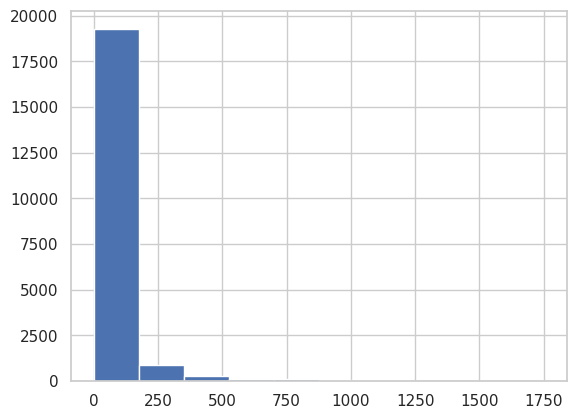

In [ ]:
full_1['create_to_launch_days'].hist()

<Axes: >

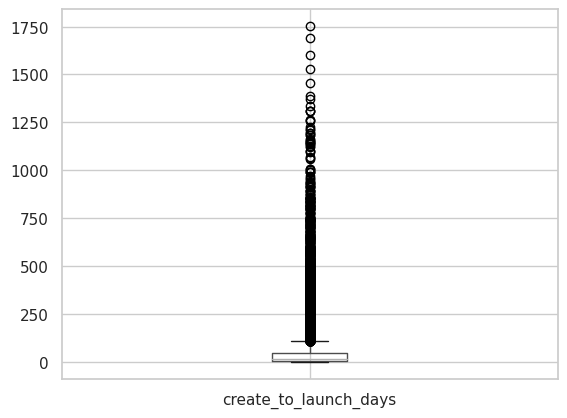

In [ ]:
full_1.boxplot(['create_to_launch_days'])

In [ ]:
feature_eda('launch_to_deadline_days')

0    36
1    60
2    60
3    30
4    32
Name: launch_to_deadline_days, dtype: int64


30    9492
60    2048
45    1223
35     638
40     632
      ... 
75       1
74       1
84       1
85       1
77       1
Name: launch_to_deadline_days, Length: 85, dtype: int64




<Axes: >

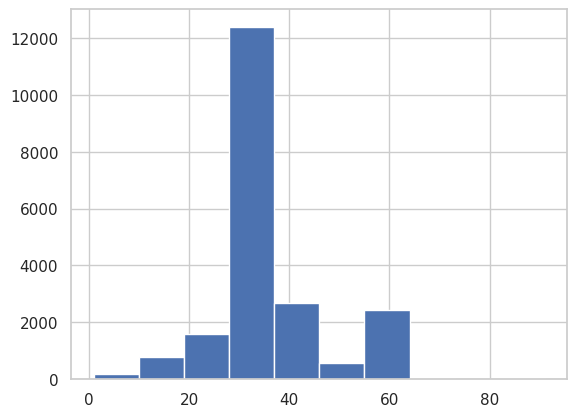

In [ ]:
full_1['launch_to_deadline_days'].hist()

<Axes: >

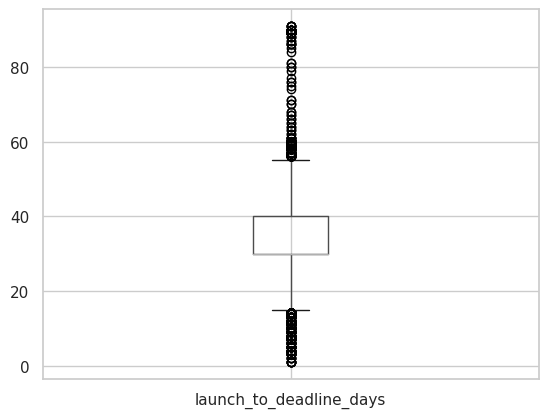

In [ ]:
full_1.boxplot(['launch_to_deadline_days'])

In [ ]:
feature_eda('launch_to_state_change_days')

0    36
1    60
2    60
3    30
4    32
Name: launch_to_state_change_days, dtype: int64


30    8160
60    1642
45     988
0      718
35     547
      ... 
70       2
79       1
74       1
69       1
84       1
Name: launch_to_state_change_days, Length: 84, dtype: int64




<Axes: >

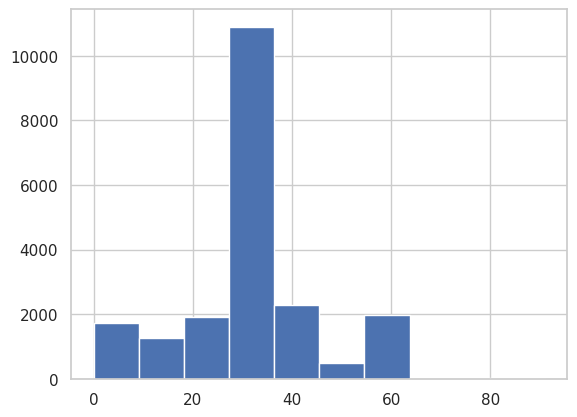

In [ ]:
full_1['launch_to_state_change_days'].hist()

<Axes: >

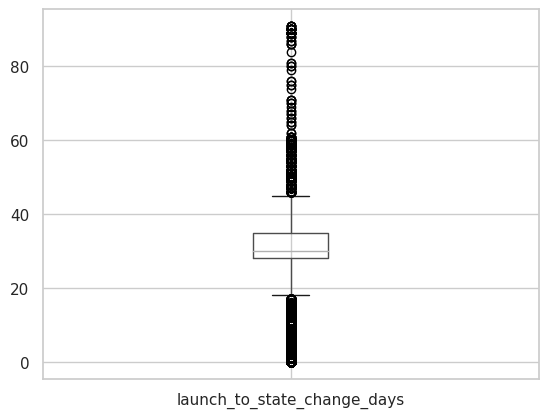

In [ ]:
full_1.boxplot('launch_to_state_change_days')

In [ ]:
feature_eda('SuccessfulBool')

0    0
1    0
2    0
3    0
4    0
Name: SuccessfulBool, dtype: int64


0    14614
1     6018
Name: SuccessfulBool, dtype: int64




In [ ]:
feature_eda('USorGB')

0    1
1    1
2    1
3    1
4    0
Name: USorGB, dtype: int64


1    16639
0     3993
Name: USorGB, dtype: int64




In [ ]:
feature_eda('TOPCOUNTRY')

0    1
1    1
2    1
3    1
4    0
Name: TOPCOUNTRY, dtype: int64


1    16840
0     3792
Name: TOPCOUNTRY, dtype: int64




In [ ]:
feature_eda('LaunchedTuesday')

0    0
1    0
2    0
3    0
4    0
Name: LaunchedTuesday, dtype: int64


0    15987
1     4645
Name: LaunchedTuesday, dtype: int64




In [ ]:
feature_eda('DeadlineWeekend')

0    0
1    0
2    0
3    0
4    0
Name: DeadlineWeekend, dtype: int64


0    14607
1     6025
Name: DeadlineWeekend, dtype: int64




In [ ]:
#////// TQDM CODE https:/ import SnowballStemmer
# stemmer = SnowballStemmer("english")
# full_1['name_stemmed'] = full_1.name.map(lambda x: ' '.join([stemmer.stem(y) for y in x.split(' ')]))
# full_1['name_stemmed'].head()

# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfTransformer

# cvec = CountVectorizer(stop_words='english', min_df=7, max_df=0.1, ngram_range=(1,3))
# cvec

# from itertools import islice
# cvec.fit(full_1.name_stemmed)
# list(islice(cvec.vocabulary_.items(), 50))

# len(cvec.vocabulary_)

# cvec_counts = cvec.transform(full_1['name_stemmed'])

# print('sparse matrix shape:', cvec_counts.shape)
# print('nonzero count:', cvec_counts.nnz)
# print('sparsity: %.2f%%' % (100.0 * cvec_counts.nnz / (cvec_counts.shape[0] * cvec_counts.shape[1])))

# occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
# counts_df = pd.DataFrame({'term': cvec.get_feature_names_out(), 'occurrences': occ})
# counts_df.sort_values(by='occurrences', ascending=True).head(20)

0    aunti di music time sign asl for hear and hoh ...
1                      jump start kindergarten toolkit
2    ojukwu balewa awolowo (o.b.a.) public librari ...
3         mastiz - [mas-tahyz, mas-tahyz]  - to spread
4    synops der eu-dsgvo - artikel, erwägungsgründe...
Name: name_stemmed, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

cvec = CountVectorizer(stop_words='english', min_df=7, max_df=0.1, ngram_range=(1,3))
cvec

CountVectorizer(max_df=0.1, min_df=7, ngram_range=(1, 3), stop_words='english')

In [ ]:
from itertools import islice
cvec.fit(full_1.name_stemmed)
list(islice(cvec.vocabulary_.items(), 50))

[('di', 577),
 ('music', 1375),
 ('time', 2096),
 ('sign', 1854),
 ('hear', 977),
 ('children', 388),
 ('jump', 1137),
 ('start', 1966),
 ('toolkit', 2111),
 ('public', 1622),
 ('librari', 1203),
 ('spread', 1954),
 ('der', 557),
 ('shadow', 1830),
 ('school', 1783),
 ('board', 257),
 ('texa', 2068),
 ('research', 1709),
 ('aid', 68),
 ('invest', 1096),
 ('club', 417),
 ('collect', 432),
 ('work', 2303),
 ('build', 302),
 ('project', 1609),
 ('book', 263),
 ('explor', 739),
 ('futur', 869),
 ('want', 2237),
 ('learn', 1182),
 ('english', 700),
 ('mobil', 1334),
 ('class', 402),
 ('world', 2306),
 ('seek', 1809),
 ('sit', 1865),
 ('advanc', 58),
 ('document', 605),
 ('measur', 1295),
 ('diari', 578),
 ('read', 1663),
 ('vision', 2220),
 ('letter', 1200),
 ('john', 1129),
 ('send', 1814),
 ('play', 1543),
 ('course', 498),
 ('journey', 1132),
 ('south', 1933),
 ('photo', 1514)]

In [ ]:
len(cvec.vocabulary_)

2336

In [ ]:
cvec_counts = cvec.transform(full_1['name_stemmed'])

In [ ]:
print('sparse matrix shape:', cvec_counts.shape)
print('nonzero count:', cvec_counts.nnz)
print('sparsity: %.2f%%' % (100.0 * cvec_counts.nnz / (cvec_counts.shape[0] * cvec_counts.shape[1])))

sparse matrix shape: (20632, 2336)
nonzero count: 67505
sparsity: 0.14%


In [ ]:
occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'term': cvec.get_feature_names_out(), 'occurrences': occ})
counts_df.sort_values(by='occurrences', ascending=True).head(20)

,term,occurrences
851,french,7
338,canva,7
337,cannabi,7
331,camera stabil,7
811,flip,7
815,flower,7
816,fly,7
818,foam,7
321,caddi,7
320,cad,7


In [ ]:
full_1['backers_count'].value_counts()

0       2936
1       1914
2       1276
3        910
4        714
        ... 
1513       1
3863       1
2051       1
737        1
819        1
Name: backers_count, Length: 1505, dtype: int64

In [ ]:
with_feature = pd.read_csv('/content/drive/MyDrive/257/ML Project/kickstarter_data_with_features.csv')
with_feature.head()

,Unnamed: 0,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,...,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch,launch_to_deadline,launch_to_state_change
0,0,1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,...,29,2014,22,12,17,2014,13,17 days 14:51:39.000000000,36 days 20:47:24.000000000,NaN
1,1,1655206086,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Jump Start Kindergarten Toolkit,"This kit teaches how to print, correct an ugly...",500.0,0.0,failed,jump-start-kindergarten-toolkit,False,...,20,2015,9,3,2,2015,16,10 days 06:44:39.000000000,60 days 00:00:00.000000000,NaN
2,2,311581827,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,"Establishing a free, world-class, public libra...",100000.0,120.0,failed,ojukwu-balewa-awolowo-oba-public-library-of-ni...,False,...,24,2015,0,1,25,2015,8,1 days 08:08:58.000000000,60 days 00:00:00.000000000,NaN
3,3,859724515,"{""small"":""https://ksr-ugc.imgix.net/assets/011...","MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",Goal: Introducing a new word into the English ...,5000.0,0.0,failed,mastize-mas-tahyz-mas-tahyz-to-spread,False,...,5,2014,22,9,6,2014,0,0 days 02:11:17.000000000,30 days 00:00:00.000000000,NaN
4,4,1613604977,"{""small"":""https://ksr-ugc.imgix.net/assets/012...","Synopse der EU-DSGVO - Artikel, Erwägungsgründ...",Zu den Artikeln der DSGVO sind die korrespondi...,3222.0,356.0,failed,synopse-der-eu-dsgvo-artikel-erwagungsgrunde-bdsg,False,...,25,2016,14,5,26,2016,5,0 days 15:47:38.000000000,32 days 06:02:33.000000000,NaN


In [ ]:
with_feature.isna().sum()

Unnamed: 0                      0
id                              0
photo                           0
name                            0
blurb                           5
goal                            0
pledged                         0
state                           0
slug                            0
disable_communication           0
country                         0
currency                        0
currency_symbol                 0
currency_trailing_code          0
deadline                        0
state_changed_at                0
created_at                      0
launched_at                     0
staff_pick                      0
backers_count                   0
static_usd_rate                 0
usd_pledged                     0
creator                         0
location                       45
category                     1889
profile                         0
spotlight                       0
urls                            0
source_url                      0
friends       

In [ ]:
with_feature['launch_to_state_change'].isna().sum()

14614

In [ ]:
temp.isna().sum()

Unnamed: 0                      0
id                              0
photo                           0
name                            0
blurb                           5
goal                            0
pledged                         0
state                           0
slug                            0
disable_communication           0
country                         0
currency                        0
currency_symbol                 0
currency_trailing_code          0
deadline                        0
state_changed_at                0
created_at                      0
launched_at                     0
staff_pick                      0
backers_count                   0
static_usd_rate                 0
usd_pledged                     0
creator                         0
location                       45
category                     1889
profile                         0
spotlight                       0
urls                            0
source_url                      0
friends       

In [ ]:
full['category'].value_counts()

Web             3325
Hardware        3248
Software        2631
Gadgets         2336
Plays           1184
Apps            1168
Wearables        971
Musical          791
Sound            528
Festivals        482
Robots           473
Flight           373
Experimental     321
Immersive        277
Makerspaces      203
Spaces           182
Places           100
Shorts            40
Thrillers         20
Webseries         20
Restaurants       20
Blues             20
Academic          20
Comedy            10
Name: category, dtype: int64

In [ ]:
full.columns

Index(['Unnamed: 0', 'id', 'photo', 'name', 'blurb', 'goal', 'pledged',
       'state', 'slug', 'disable_communication', 'country', 'currency',
       'currency_symbol', 'currency_trailing_code', 'deadline',
       'state_changed_at', 'created_at', 'launched_at', 'staff_pick',
       'backers_count', 'static_usd_rate', 'usd_pledged', 'creator',
       'location', 'category', 'profile', 'spotlight', 'urls', 'source_url',
       'friends', 'is_starred', 'is_backing', 'permissions', 'name_len',
       'name_len_clean', 'blurb_len', 'blurb_len_clean', 'deadline_weekday',
       'state_changed_at_weekday', 'created_at_weekday', 'launched_at_weekday',
       'deadline_month', 'deadline_day', 'deadline_yr', 'deadline_hr',
       'state_changed_at_month', 'state_changed_at_day', 'state_changed_at_yr',
       'state_changed_at_hr', 'created_at_month', 'created_at_day',
       'created_at_yr', 'created_at_hr', 'launched_at_month',
       'launched_at_day', 'launched_at_yr', 'launched_at_hr',
   

In [ ]:
with_feature.columns

Index(['Unnamed: 0', 'id', 'photo', 'name', 'blurb', 'goal', 'pledged',
       'state', 'slug', 'disable_communication', 'country', 'currency',
       'currency_symbol', 'currency_trailing_code', 'deadline',
       'state_changed_at', 'created_at', 'launched_at', 'staff_pick',
       'backers_count', 'static_usd_rate', 'usd_pledged', 'creator',
       'location', 'category', 'profile', 'spotlight', 'urls', 'source_url',
       'friends', 'is_starred', 'is_backing', 'permissions', 'name_len',
       'name_len_clean', 'blurb_len', 'blurb_len_clean', 'deadline_weekday',
       'state_changed_at_weekday', 'created_at_weekday', 'launched_at_weekday',
       'deadline_month', 'deadline_day', 'deadline_yr', 'deadline_hr',
       'state_changed_at_month', 'state_changed_at_day', 'state_changed_at_yr',
       'state_changed_at_hr', 'created_at_month', 'created_at_day',
       'created_at_yr', 'created_at_hr', 'launched_at_month',
       'launched_at_day', 'launched_at_yr', 'launched_at_hr',
   

In [ ]:
full.shape

(20632, 68)

In [ ]:
with_feature.shape

(20632, 60)

In [ ]:
temp = full.iloc[:,:59]
temp.columns

Index(['Unnamed: 0', 'id', 'photo', 'name', 'blurb', 'goal', 'pledged',
       'state', 'slug', 'disable_communication', 'country', 'currency',
       'currency_symbol', 'currency_trailing_code', 'deadline',
       'state_changed_at', 'created_at', 'launched_at', 'staff_pick',
       'backers_count', 'static_usd_rate', 'usd_pledged', 'creator',
       'location', 'category', 'profile', 'spotlight', 'urls', 'source_url',
       'friends', 'is_starred', 'is_backing', 'permissions', 'name_len',
       'name_len_clean', 'blurb_len', 'blurb_len_clean', 'deadline_weekday',
       'state_changed_at_weekday', 'created_at_weekday', 'launched_at_weekday',
       'deadline_month', 'deadline_day', 'deadline_yr', 'deadline_hr',
       'state_changed_at_month', 'state_changed_at_day', 'state_changed_at_yr',
       'state_changed_at_hr', 'created_at_month', 'created_at_day',
       'created_at_yr', 'created_at_hr', 'launched_at_month',
       'launched_at_day', 'launched_at_yr', 'launched_at_hr',
   

In [ ]:
temp.equals(with_feature.iloc[:,:59])

True

In [ ]:
temp.head(1)

,Unnamed: 0,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,...,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch,launch_to_deadline,launch_to_state_change
0,0,1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,...,29,2014,22,12,17,2014,13,17 days 14:51:39.000000000,36 days 20:47:24.000000000,36 days 20:47:24.000000000


In [ ]:
with_feature.head(1)

,Unnamed: 0,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,...,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch,launch_to_deadline,launch_to_state_change
0,0,1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,...,29,2014,22,12,17,2014,13,17 days 14:51:39.000000000,36 days 20:47:24.000000000,NaN


In [ ]:
!pip install ydata-profiling

import ydata_profiling
ydata_profiling.ProfileReport(temp)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Conclusion is that the full dataset already have dataset with features.

##Using the Full DataSet

In [ ]:
full.head()

,Unnamed: 0,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,...,launch_to_deadline,launch_to_state_change,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend
0,0,1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,...,36 days 20:47:24.000000000,36 days 20:47:24.000000000,17,36,36,0,1,1,0,0
1,1,1655206086,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Jump Start Kindergarten Toolkit,"This kit teaches how to print, correct an ugly...",500.0,0.0,failed,jump-start-kindergarten-toolkit,False,...,60 days 00:00:00.000000000,60 days 00:00:02.000000000,10,60,60,0,1,1,0,0
2,2,311581827,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,"Establishing a free, world-class, public libra...",100000.0,120.0,failed,ojukwu-balewa-awolowo-oba-public-library-of-ni...,False,...,60 days 00:00:00.000000000,60 days 00:00:01.000000000,1,60,60,0,1,1,0,0
3,3,859724515,"{""small"":""https://ksr-ugc.imgix.net/assets/011...","MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",Goal: Introducing a new word into the English ...,5000.0,0.0,failed,mastize-mas-tahyz-mas-tahyz-to-spread,False,...,30 days 00:00:00.000000000,30 days 00:00:00.000000000,0,30,30,0,1,1,0,0
4,4,1613604977,"{""small"":""https://ksr-ugc.imgix.net/assets/012...","Synopse der EU-DSGVO - Artikel, Erwägungsgründ...",Zu den Artikeln der DSGVO sind die korrespondi...,3222.0,356.0,failed,synopse-der-eu-dsgvo-artikel-erwagungsgrunde-bdsg,False,...,32 days 06:02:33.000000000,32 days 06:02:33.000000000,0,32,32,0,0,0,0,0


In [ ]:
full.shape

(20632, 68)

In [ ]:
print(full.iloc[:,:36].isna().sum())

Unnamed: 0                    0
id                            0
photo                         0
name                          0
blurb                         5
goal                          0
pledged                       0
state                         0
slug                          0
disable_communication         0
country                       0
currency                      0
currency_symbol               0
currency_trailing_code        0
deadline                      0
state_changed_at              0
created_at                    0
launched_at                   0
staff_pick                    0
backers_count                 0
static_usd_rate               0
usd_pledged                   0
creator                       0
location                     45
category                   1889
profile                       0
spotlight                     0
urls                          0
source_url                    0
friends                   20572
is_starred                20572
is_backi

In [ ]:
full['state'].value_counts()

failed        11416
successful     6018
canceled       2460
live            508
suspended       230
Name: state, dtype: int64

In [ ]:
print(full.iloc[:,36:].isna().sum())

blurb_len_clean                5
deadline_weekday               0
state_changed_at_weekday       0
created_at_weekday             0
launched_at_weekday            0
deadline_month                 0
deadline_day                   0
deadline_yr                    0
deadline_hr                    0
state_changed_at_month         0
state_changed_at_day           0
state_changed_at_yr            0
state_changed_at_hr            0
created_at_month               0
created_at_day                 0
created_at_yr                  0
created_at_hr                  0
launched_at_month              0
launched_at_day                0
launched_at_yr                 0
launched_at_hr                 0
create_to_launch               0
launch_to_deadline             0
launch_to_state_change         0
create_to_launch_days          0
launch_to_deadline_days        0
launch_to_state_change_days    0
SuccessfulBool                 0
USorGB                         0
TOPCOUNTRY                     0
LaunchedTu

removing features Unnamed: 0,id,photo,friends,is_starred, is_backing,permissions from the dataset              

In [ ]:
full_1 = full.drop(['Unnamed: 0', 'id', 'photo', 'friends', 'is_starred', 'is_backing', 'permissions'], axis=1)

In [ ]:
full_1.shape

(20632, 61)

In [ ]:
full_1.head()

,name,blurb,goal,pledged,state,slug,disable_communication,country,currency,currency_symbol,...,launch_to_deadline,launch_to_state_change,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend
0,Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,US,USD,$,...,36 days 20:47:24.000000000,36 days 20:47:24.000000000,17,36,36,0,1,1,0,0
1,Jump Start Kindergarten Toolkit,"This kit teaches how to print, correct an ugly...",500.0,0.0,failed,jump-start-kindergarten-toolkit,False,US,USD,$,...,60 days 00:00:00.000000000,60 days 00:00:02.000000000,10,60,60,0,1,1,0,0
2,Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,"Establishing a free, world-class, public libra...",100000.0,120.0,failed,ojukwu-balewa-awolowo-oba-public-library-of-ni...,False,US,USD,$,...,60 days 00:00:00.000000000,60 days 00:00:01.000000000,1,60,60,0,1,1,0,0
3,"MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",Goal: Introducing a new word into the English ...,5000.0,0.0,failed,mastize-mas-tahyz-mas-tahyz-to-spread,False,US,USD,$,...,30 days 00:00:00.000000000,30 days 00:00:00.000000000,0,30,30,0,1,1,0,0
4,"Synopse der EU-DSGVO - Artikel, Erwägungsgründ...",Zu den Artikeln der DSGVO sind die korrespondi...,3222.0,356.0,failed,synopse-der-eu-dsgvo-artikel-erwagungsgrunde-bdsg,False,DE,EUR,€,...,32 days 06:02:33.000000000,32 days 06:02:33.000000000,0,32,32,0,0,0,0,0


In [ ]:
# display_df = full_1.iloc[:,:10]
display_df = pd.concat([full_1.iloc[:,:10], full_1['state']], axis=1)
display_df.head()
# full_1.iloc[:,:10].corr()
# heatmap = sns.heatmap(full_1.iloc[:,:10].corr(), vmin=-1, vmax=1, annot=True)

,name,blurb,goal,pledged,state,slug,disable_communication,country,currency,currency_symbol,state
0,Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,US,USD,$,failed
1,Jump Start Kindergarten Toolkit,"This kit teaches how to print, correct an ugly...",500.0,0.0,failed,jump-start-kindergarten-toolkit,False,US,USD,$,failed
2,Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,"Establishing a free, world-class, public libra...",100000.0,120.0,failed,ojukwu-balewa-awolowo-oba-public-library-of-ni...,False,US,USD,$,failed
3,"MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",Goal: Introducing a new word into the English ...,5000.0,0.0,failed,mastize-mas-tahyz-mas-tahyz-to-spread,False,US,USD,$,failed
4,"Synopse der EU-DSGVO - Artikel, Erwägungsgründ...",Zu den Artikeln der DSGVO sind die korrespondi...,3222.0,356.0,failed,synopse-der-eu-dsgvo-artikel-erwagungsgrunde-bdsg,False,DE,EUR,€,failed


In [ ]:
display_df['currency_symbol'].value_counts()

$      16139
£       2498
€       1618
kr       283
Fr        94
Name: currency_symbol, dtype: int64

In [ ]:
display_df[display_df['currency_symbol']=='$']['currency'].value_counts()

USD    14141
CAD     1098
AUD      674
NZD      111
MXN       55
HKD       35
SGD       25
Name: currency, dtype: int64